<a href="https://colab.research.google.com/github/mdrinkard/Project-2/blob/main/Data_analysis_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import seaborn as sn
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import holoviews as hv


In [2]:
### Uploading Dataset
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving SBA_CLEANED .csv to SBA_CLEANED .csv


In [3]:
### Creating Dataframe
### Creating Dataframe
df = pd.read_csv('SBA_CLEANED .csv')
df

,City,State,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,Industry,TermGroup,NewBankState,IsFranchise,City_Count,NewBank
0,EVANSVILLE,IN,4,2.0,0,0,0,N,Y,0,60000,Retail Trade,Below 3 months,OH,Y,318,FIFTH THIRD BANK
1,EVANSVILLE,IN,3,2.0,0,0,0,N,Y,0,90000,Construction,Below 3 months,OH,Y,318,FIFTH THIRD BANK
2,EVANSVILLE,IN,4,1.0,0,0,0,N,Y,1,60000,Retail Trade,Below 3 months,OH,Y,318,FIFTH THIRD BANK
3,EVANSVILLE,IN,11,1.0,0,0,0,N,N,0,300000,Unknown Sector,Below 3 months,OH,Y,318,FIFTH THIRD BANK
4,EVANSVILLE,IN,7,2.0,0,7,2,N,N,1,415000,Retail Trade,Below 3 months,OH,Y,318,FIFTH THIRD BANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885300,MEALLY,KY,3,2.0,0,0,0,N,Y,0,40000,Construction,Below 3 months,KY,Y,1,OTHER
885301,GUSTON,KY,2,2.0,0,0,0,N,Y,0,20000,Unknown Sector,Below 3 months,KY,Y,1,OTHER
885302,"GERING,",NE,15,2.0,0,0,0,N,N,1,252000,Unknown Sector,3-6 months,IL,Y,1,OTHER
885303,SHELLMAN,GA,2,2.0,0,0,0,N,Y,0,100000,Unknown Sector,3-6 months,GA,Y,1,OTHER


In [4]:
df_analysis = df.copy()
df_analysis = df_analysis.dropna()
df_analysis.drop(columns=['City_Count','City'], inplace=True)
display(df_analysis.isnull().sum())

State           0
NoEmp           0
NewExist        0
CreateJob       0
RetainedJob     0
UrbanRural      0
RevLineCr       0
LowDoc          0
MIS_Status      0
GrAppv          0
Industry        0
TermGroup       0
NewBankState    0
IsFranchise     0
NewBank         0
dtype: int64

In [5]:
df_analysis['NewExist'] = df_analysis['NewExist'].astype(int)

In [6]:
### As we have a number of categorical variables we will be using onehotencoder to transform the X variables.
### to make it applicable to the model.
display(df_analysis.dtypes)
categorical_variables = list(df_analysis.dtypes[df_analysis.dtypes == 'object'].index)
display(categorical_variables)

State           object
NoEmp            int64
NewExist         int64
CreateJob        int64
RetainedJob      int64
UrbanRural       int64
RevLineCr       object
LowDoc          object
MIS_Status       int64
GrAppv           int64
Industry        object
TermGroup       object
NewBankState    object
IsFranchise     object
NewBank         object
dtype: object

['State',
 'RevLineCr',
 'LowDoc',
 'Industry',
 'TermGroup',
 'NewBankState',
 'IsFranchise',
 'NewBank']

In [7]:
enc= OneHotEncoder(sparse_output=False)
enc

OneHotEncoder(sparse_output=False)

In [8]:
encoded_data = enc.fit_transform(df_analysis[categorical_variables])
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)
encoded_df.shape

(885162, 163)

In [10]:
unscaled_df = pd.concat([encoded_df, df_analysis.drop(columns=categorical_variables)],axis = 1)
unscaled_df

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,NewBank_UMPQUA BANK,NewBank_WELLS FARGO BANK NATL ASSOC,NewBank_ZIONS FIRST NATIONAL BANK,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,MIS_Status,GrAppv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,60000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,90000.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,60000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,300000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,2.0,0.0,7.0,2.0,1.0,415000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,2.0,0.0,0.0,0.0,0.0,40000.0
885301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,20000.0
885302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.0,2.0,0.0,0.0,0.0,1.0,252000.0
885303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,100000.0


In [11]:
unscaled_df.dropna(inplace=True)

In [12]:
y = unscaled_df['MIS_Status']
X = unscaled_df.drop(columns='MIS_Status')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024)

In [14]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [16]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [17]:
predictions = rf_model.predict(X_test_scaled)

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,174293,8264
Actual 1,30845,7853


Accuracy Score : 0.8232401527649092
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90    182557
         1.0       0.49      0.20      0.29     38698

    accuracy                           0.82    221255
   macro avg       0.67      0.58      0.59    221255
weighted avg       0.79      0.82      0.79    221255



<Axes: >

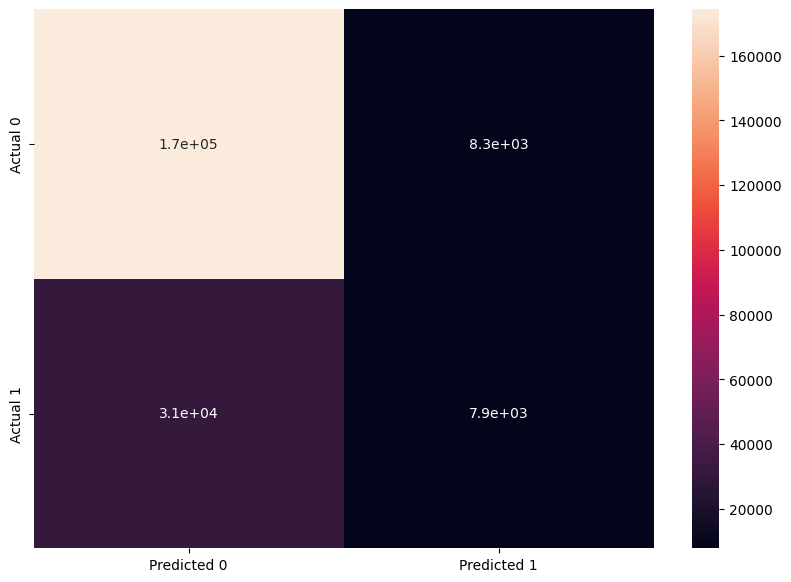

In [20]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_df, annot=True)

In [21]:
feature_importances = rf_model.feature_importances_

In [22]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [23]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
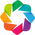

In [33]:
hv.extension('bokeh')

plt.figure(figsize=(100, 60))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [34]:
display(feature_importance_df)

,Feature,Importance
168,GrAppv,0.218284
163,NoEmp,0.117513
166,RetainedJob,0.086973
165,CreateJob,0.056027
167,UrbanRural,0.038878
...,...,...
64,Industry_Management of Companies and Enterprises,0.000154
69,Industry_Public Administration,0.000126
120,NewBankState_PR,0.000055
79,TermGroup_More Than a Year,0.000040


In [ ]:
# ### Creating Randomforest visual
# tree_sample= rf_model.estimators_[0]

In [ ]:
# feature_names = X_train.columns.tolist()
# class_names = [str(x) for x in rf_model.classes_]

In [ ]:
# dot_data = tree.export_graphviz(tree_sample, out_file=None,
#                                 feature_names=feature_names,
#                                 class_names=class_names,
#                                 filled=True, rounded=True, special_characters=True)


In [ ]:
# graph = graphviz.Source(dot_data)
# graph.render("RandomForestTree",format='png')
# graph.view("RandomForestTree")

KeyboardInterrupt: 